In [45]:
import pandas as pd
raw_data = pd.read_csv("../sangsangdata/survey_results_public.csv")

In [46]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [48]:
#국가별 개수
raw_country = raw_data["Country"]

size_country = raw_country.groupby(raw_country).size()

size_country

Country
Afghanistan                              65
Albania                                  73
Algeria                                  46
Andorra                                  12
Angola                                   27
                                       ... 
Venezuela, Bolivarian Republic of...    104
Viet Nam                                386
Yemen                                    20
Zambia                                   22
Zimbabwe                                 36
Name: Country, Length: 181, dtype: int64

<AxesSubplot:ylabel='Country'>

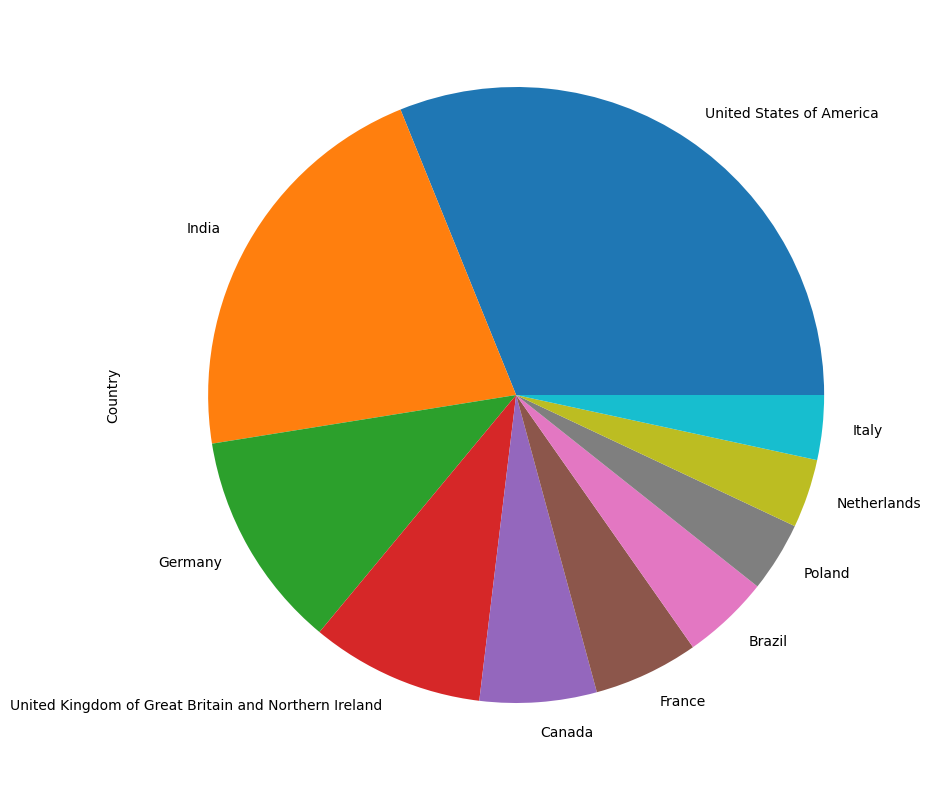

In [49]:
# 국가별 개수 시각화 (국가 종류가 너무 많으므로 상위 10개만)
size_country.nlargest(10).plot.pie(figsize=(10,10))

In [50]:
# 언어별 개수
raw_languages = raw_data["LanguageHaveWorkedWith"]

revised_languages = raw_languages.str.split(";")

explode_languages = revised_languages.explode()

size_languages = explode_languages.groupby(explode_languages).size()

size_languages

LanguageHaveWorkedWith
APL              536
Assembly        4632
Bash/Shell     22385
C              17329
C#             22984
C++            20057
COBOL            437
Clojure         1552
Crystal          466
Dart            4965
Delphi          1731
Elixir          1438
Erlang           651
F#               804
Go              7879
Groovy          2479
HTML/CSS       46259
Haskell         1749
Java           29162
JavaScript     53587
Julia           1068
Kotlin          6866
LISP            1096
Matlab          3846
Node.js        27975
Objective-C     2310
PHP            18130
Perl            2028
PowerShell      8871
Python         39792
R               4185
Ruby            5569
Rust            5799
SQL            38835
Scala           2148
Swift           4204
TypeScript     24909
VBA             3847
Name: LanguageHaveWorkedWith, dtype: int64

<AxesSubplot:ylabel='LanguageHaveWorkedWith'>

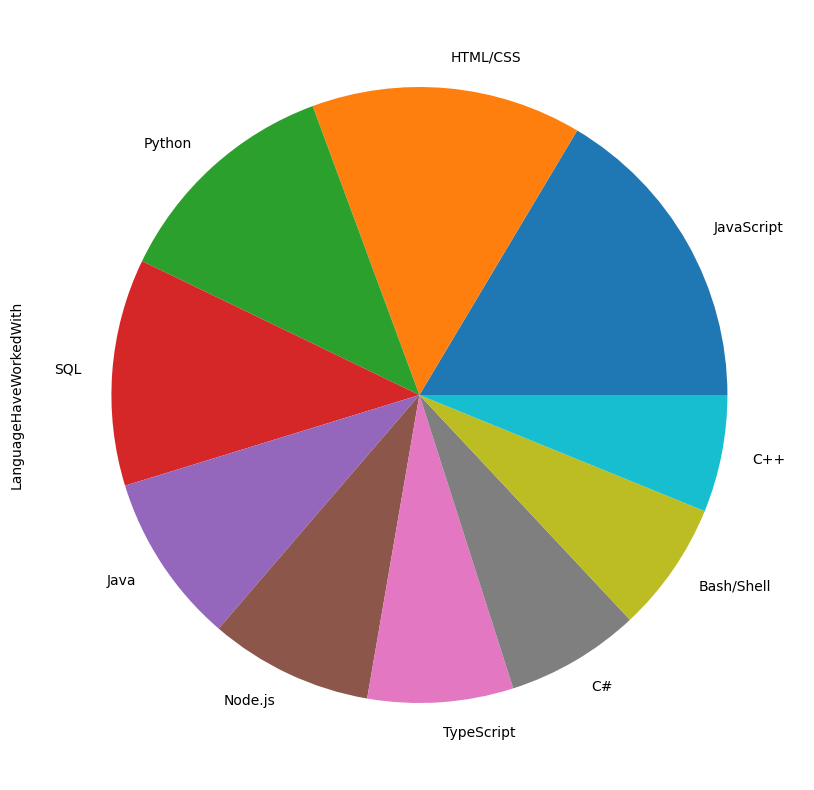

In [51]:
# 언어별 개수 시각화(언어 종류가 많으므로 상위 10개만)
size_languages.nlargest(10).plot.pie(figsize=(10,10))

In [52]:
# 운영체제별 개수

raw_os = raw_data["OpSys"]

size_os = raw_os.groupby(raw_os).size()

size_os

OpSys
BSD                                    146
Linux-based                          21088
MacOS                                20984
Other (please specify):                575
Windows                              37758
Windows Subsystem for Linux (WSL)     2743
Name: OpSys, dtype: int64

<AxesSubplot:ylabel='OpSys'>

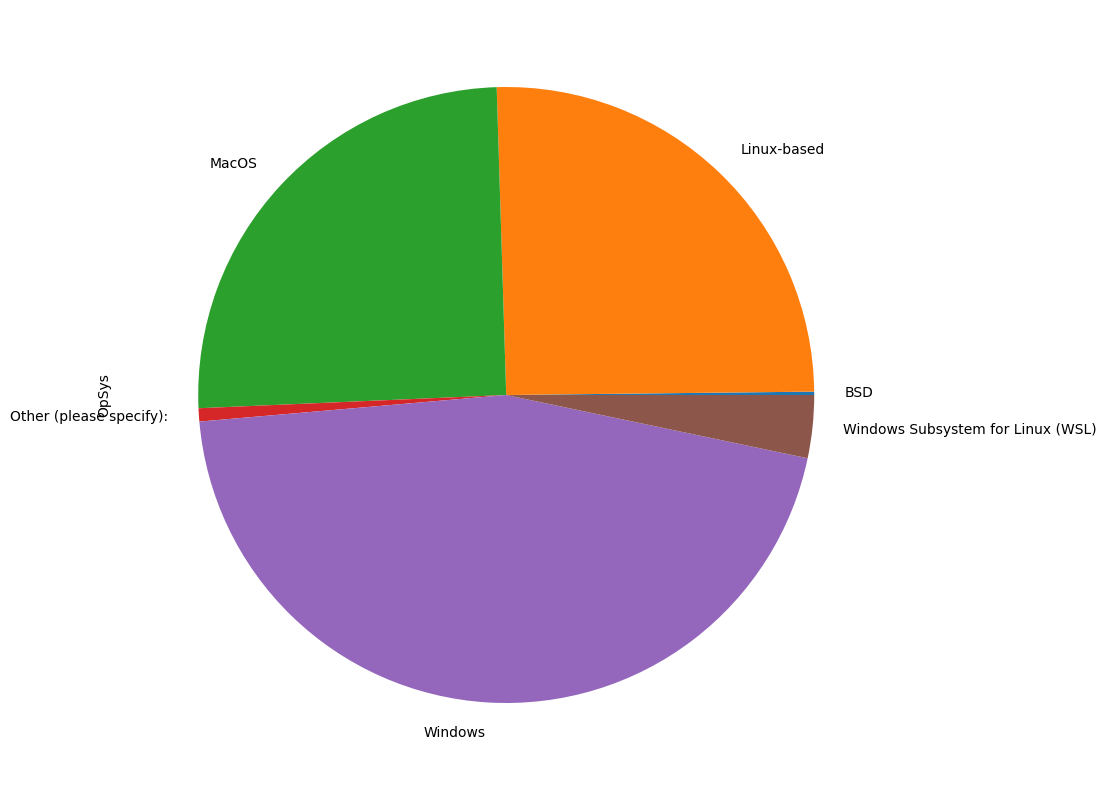

In [61]:
# 운영체제별 개수 시각화
size_os.plot.pie(figsize=(10,10))

In [77]:
# 국가별 언어별 개수 (인도 기준)

revised_data = raw_data[["Country", "LanguageHaveWorkedWith", "OpSys"]]

languages_for_india = revised_data[revised_data.Country == 'India']["LanguageHaveWorkedWith"].str.split(";").explode()

size_lan_for_india = languages_for_india.groupby(languages_for_country).size()

size_lan_for_india

LanguageHaveWorkedWith
APL              43
Assembly        379
Bash/Shell     1483
C              3057
C#             1632
C++            3163
COBOL            48
Clojure          50
Crystal          24
Dart            961
Delphi           21
Elixir           55
Erlang           30
F#               15
Go              636
Groovy          199
HTML/CSS       5844
Haskell          62
Java           4459
JavaScript     6460
Julia            81
Kotlin          838
LISP             58
Matlab          529
Node.js        3373
Objective-C     278
PHP            2044
Perl            142
PowerShell      593
Python         5233
R               475
Ruby            311
Rust            252
SQL            4289
Scala           203
Swift           391
TypeScript     2339
VBA             301
Name: LanguageHaveWorkedWith, dtype: int64

<AxesSubplot:ylabel='LanguageHaveWorkedWith'>

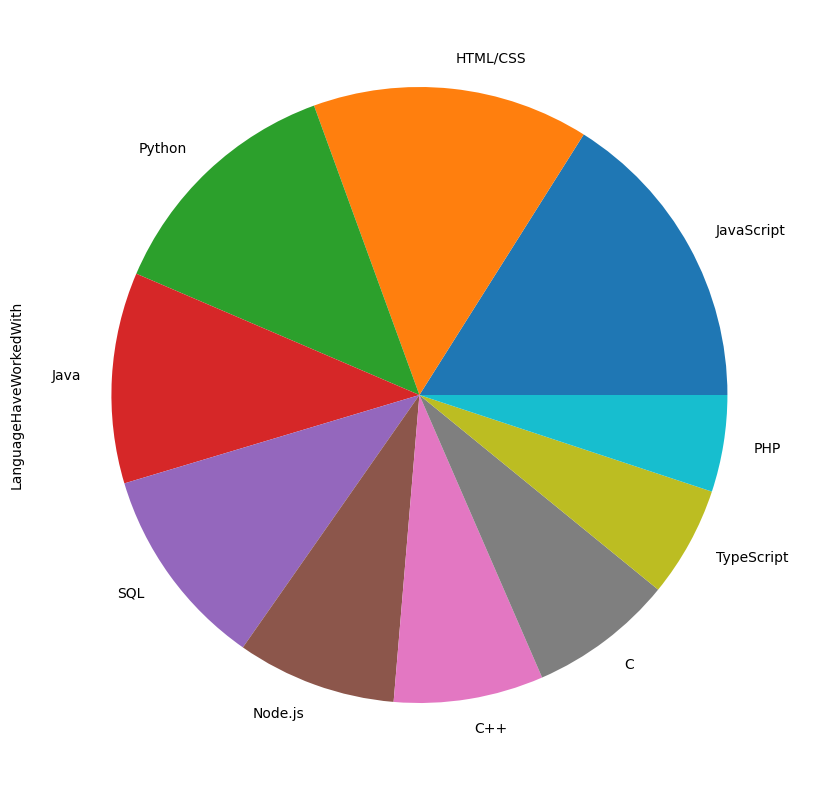

In [78]:
# 국가별 언어별 개수 시각화(언어 갯수가 많으므로 상위 10개만)

size_lan_for_india.nlargest(10).plot.pie(figsize = (10,10))

In [90]:
# 국가별 운영체제별 개수(인도 기준)

os_for_india = revised_data[revised_data.Country == 'India']['OpSys']

size_os_for_india = os_for_india.groupby(os_for_india).size()

size_os_for_india

OpSys
BSD                                    10
Linux-based                          2554
MacOS                                2045
Other (please specify):                53
Windows                              5568
Windows Subsystem for Linux (WSL)     254
Name: OpSys, dtype: int64

<AxesSubplot:ylabel='OpSys'>

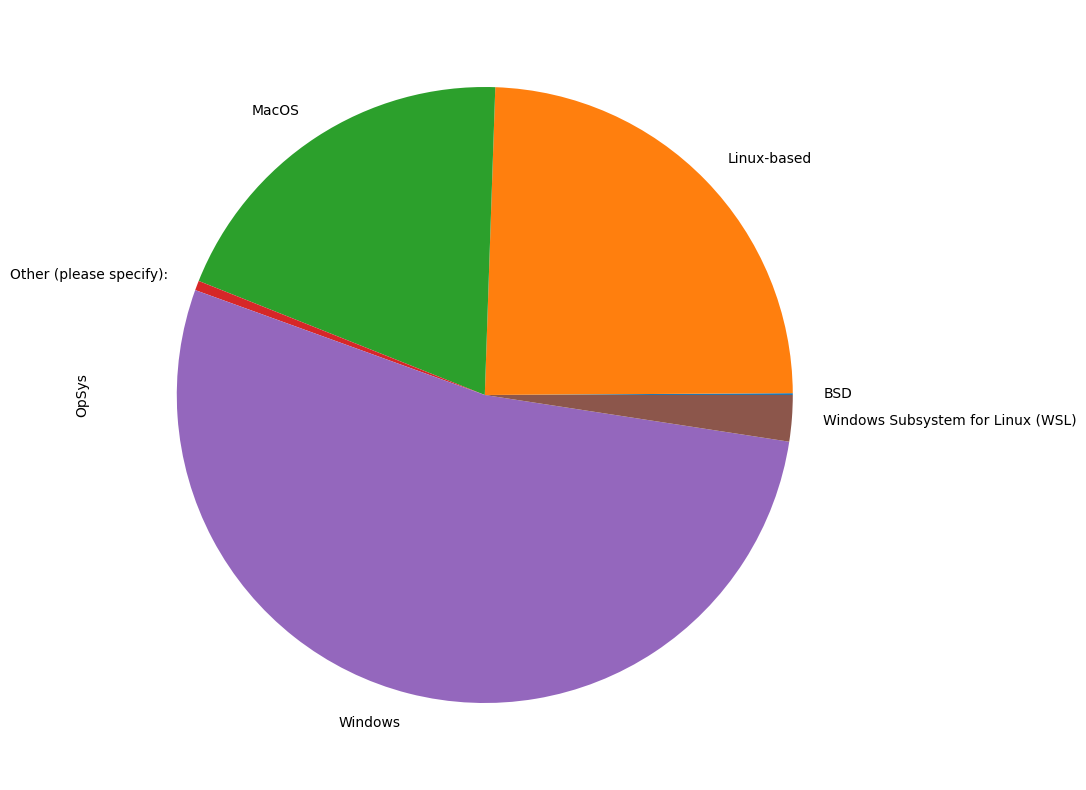

In [91]:
# 국가별 운영체제별 개수 시각화
size_os_for_india.plot.pie(figsize = (10,10))

In [94]:
# 운영체제별 언어별 개수 (윈도우 기준)

lan_for_window = revised_data[revised_data.OpSys == "Windows"]["LanguageHaveWorkedWith"].str.split(";").explode()

size_lan_for_window = lan_for_window.groupby(lan_for_window).size()

size_lan_for_window

LanguageHaveWorkedWith
APL              226
Assembly        1914
Bash/Shell      6248
C               7401
C#             16354
C++             9508
COBOL            206
Clojure          135
Crystal          148
Dart            2073
Delphi          1250
Elixir           136
Erlang            96
F#               460
Go              1566
Groovy           754
HTML/CSS       22203
Haskell          417
Java           13452
JavaScript     24175
Julia            300
Kotlin          2447
LISP             216
Matlab          1941
Node.js        11208
Objective-C      478
PHP             8168
Perl             504
PowerShell      6186
Python         15979
R               1853
Ruby             714
Rust            1285
SQL            19422
Scala            463
Swift            724
TypeScript     10524
VBA             2749
Name: LanguageHaveWorkedWith, dtype: int64

<AxesSubplot:ylabel='LanguageHaveWorkedWith'>

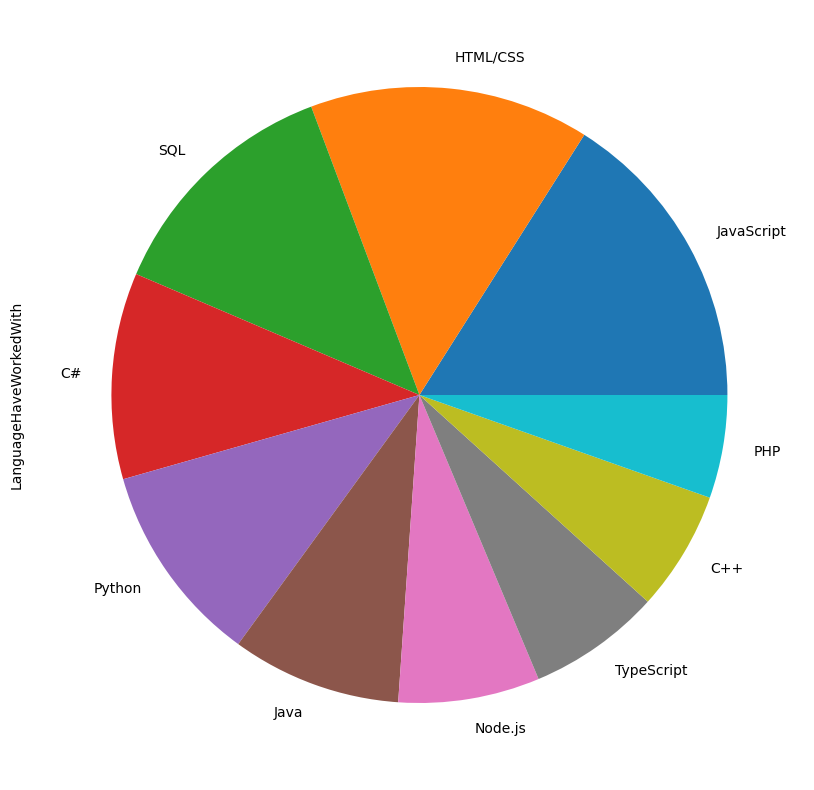

In [95]:
# 운영체제별 언어별 개수 시각화(언어 종류가 많으므로 상위 10개만)

size_lan_for_window.nlargest(10).plot.pie(figsize = (10,10))